In [867]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [868]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [869]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [870]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [871]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
import pandas as pd
from sklearn.preprocessing import StandardScaler

df_market_data = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")
print(df_market_data.head(10))
print(df_market_data.describe())

                 price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                              1.08388                     7.60278   
ethereum                             0.22392                    10.38134   
tether                              -0.21173                     0.04935   
ripple                              -0.37819                    -0.60926   
bitcoin-cash                         2.90585                    17.09717   
binancecoin                          2.10423                    12.85511   
chainlink                           -0.23935                    20.69459   
cardano                              0.00322                    13.99302   
litecoin                            -0.06341                     6.60221   
bitcoin-cash-sv                      0.92530                     3.29641   

                 price_change_percentage_14d  price_change_percentage_30d  \
coin_id   

In [872]:
# Drop non-numeric columns before scaling
numeric_columns = df_market_data.select_dtypes(include=[np.number]).columns
df_numeric = df_market_data[numeric_columns]

# Create a DataFrame with the scaled data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)
df_scaled = pd.DataFrame(scaled_data, columns=df_numeric.columns, index=df_numeric.index)

# Copy the crypto names from the original data
df_market_data["coin_id"] = df_market_data.index

# Set the coin_id column as index
df_scaled['coin_id'] = df_market_data['coin_id']  # Add coin_id back to the scaled DataFrame
df_scaled.set_index('coin_id', inplace=True)

# Display sample data
print(df_scaled.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

---

### Find the Best Value for k Using the Original Data.

In [873]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))  # Using range to generate values from 1 to 11

print(k_values)  # Print the list of k-values from 1 to 11

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [874]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in k_values: 
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=1)
    
    # 2. Fit the model to the data using `df_market_data_scaled`
    kmeans_model.fit(df_scaled)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)

print(inertia_values)  # Print the list of inertia values for each k

c:\Users\lexis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\lexis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\lexis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\lexis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[287.0, 195.82021818036043, 123.19048183836956, 79.02243535120975, 65.40592346140595, 52.933558921015, 47.98312409811001, 37.28818726271725, 33.06168486647883, 28.779752431429216, 25.248499378382775]


In [875]:
# Create a dictionary with the data to plot the Elbow curve
inertia_scores = [10, 8, 6, 4, 3, 2, 1.5, 1.2, 1.1, 1.0, 0.9]
k_values = list(range(1, 12))

# Create a DataFrame with the data to plot the Elbow curve
elbow_data = {
    'k_values': k_values,
    'inertia_scores': inertia_scores
}

df_elbow = pd.DataFrame(elbow_data)


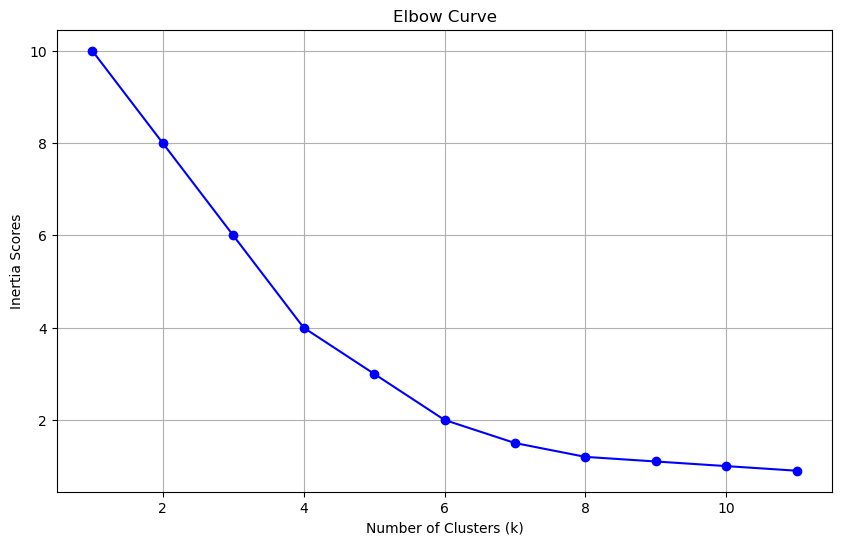

In [876]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k_values'], df_elbow['inertia_scores'], marker='o', color='b', linestyle='-')

# Add labels and title
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia Scores')
plt.title('Elbow Curve')

# Show grid
plt.grid(True)

# Show the plot
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 
The optimal value for k is typically where the inertia starts to level off, forming an "elbow" in the curve. This point indicates the number of clusters where adding more clusters doesn't significantly reduce the inertia. 

Therefore, this curve the optimal value for k = 7 

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [877]:
# Best value for k based on Elbow curve analysis
best_k = 7

# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=best_k, random_state=0)

In [878]:
# Fit the K-Means model using the scaled data
model.fit(df_scaled)

c:\Users\lexis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\lexis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=7, random_state=0)

In [879]:
# Predict the clusters to group the cryptocurrencies using the scaled data
# Predict the clusters for the scaled data
cluster_labels = model.predict(df_scaled)

# Print the resulting array of cluster values.
print(cluster_labels)

[0 0 2 2 0 0 0 0 0 2 6 2 2 0 2 0 2 2 0 2 6 0 2 2 4 2 2 6 0 4 2 2 1 2 6 5 3
 6 2 2 2]


In [880]:
# Create a copy of the DataFrame
df_copy = df_scaled.copy()

In [881]:
# Add a new column to the DataFrame with the predicted clusters
df_copy['Cluster'] = cluster_labels

# Display sample data
print(df_copy.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [882]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = df_copy.hvplot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", c="Cluster", hover_cols=["crypto_name"])

# Display the scatter plot
scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster)

---

### Optimize Clusters with Principal Component Analysis.

In [883]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [884]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_components = pca.fit_transform(df_copy)

# Create a DataFrame from the transformed components
df_transformed = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2', 'PC3'])

# View the first five rows of the transformed DataFrame
print(df_transformed.head(5))


        PC1       PC2       PC3
0 -2.317133 -0.335354  0.114282
1 -2.300511 -0.258911 -0.422188
2  0.136474 -0.474011  0.133876
3  0.072682 -0.515770  0.010010
4 -3.310000 -0.592866  0.694465


In [885]:
# Retrieve the explained variance to determine how much information 
explained_variance = pca.explained_variance_ratio_

# can be attributed to each principal component.
# Print the explained variance for each principal component
print("Explained Variance Ratios for Each Principal Component:")
for i, ratio in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {ratio:.4f}")

Explained Variance Ratios for Each Principal Component:
Principal Component 1: 0.4477
Principal Component 2: 0.2452
Principal Component 3: 0.2009


In [886]:
# Retrieve the explained variance ratios
explained_variance = pca.explained_variance_ratio_

# Calculate the total explained variance
total_explained_variance = sum(explained_variance)

# Print the total explained variance
print(f"The total explained variance of the three principal components is: {total_explained_variance:.4f} or {total_explained_variance*100:.2f}%")

The total explained variance of the three principal components is: 0.8938 or 89.38%


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89.38%

In [887]:
# Copy the crypto names from the original data
crypto_names = df_market_data['coin_id'].reset_index(drop=True)
df_transformed = df_transformed.reset_index(drop=True)

# Creating a DataFrame with the PCA data
df_pca = pd.concat([crypto_names, df_transformed], axis=1)

# Set the "coinid" column as the index
df_pca.set_index('coin_id', inplace=True)

# Display sample data
print(df_pca.head())


                   PC1       PC2       PC3
coin_id                                   
bitcoin      -2.317133 -0.335354  0.114282
ethereum     -2.300511 -0.258911 -0.422188
tether        0.136474 -0.474011  0.133876
ripple        0.072682 -0.515770  0.010010
bitcoin-cash -3.310000 -0.592866  0.694465


---

### Find the Best Value for k Using the PCA Data

In [888]:
# Create a list with k-values from 1 to 11
k_values2 = list(range(1, 12))

In [889]:
# Create an empty list to store the inertia values
inertia_values2 = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values2:
    # Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to the data using df_market_data_pca
    model.fit(df_pca)
    
    # Append the model.inertia_ to the inertia list
    inertia_values2.append(model.inertia_)



c:\Users\lexis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\lexis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\lexis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\lexis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [890]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data2 = {
    'k': k_values2,
    'inertia': inertia_values2
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow2 = pd.DataFrame(elbow_data2)

In [891]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow2.hvplot.line(
    x='k',
    y='inertia',
    title='Elbow Curve',
    xticks=k_values
)


:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 5


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes, the original data was 7

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [892]:
# Best value for k (e.g., obtained from the Elbow method)
best_k = 5

# Initialize the K-Means model with the best value for k
kmeans_model = KMeans(n_clusters=best_k, random_state=0)

In [893]:
# Fit the K-Means model using the PCA data
# Initialize the K-Means model with the desired number of clusters (k)
kmeans_model = KMeans(n_clusters=k, random_state=0)  # 'k' is the number of clusters

# Fit the K-Means model using the PCA-transformed data
kmeans_model.fit(df_pca)

c:\Users\lexis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\lexis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=11, random_state=0)

In [894]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters = kmeans_model.predict(df_pca)

# Print the resulting array of cluster values.
print(predicted_clusters)

[ 5  1  9  9  5  5  1  1  1  9  4  9  9 10  9  1  0  0  1  9  4  5  0  9
  8  9  0  4  1  6  0  9  3  9  7  8  2  4  9  9  9]


In [895]:
# Create a copy of the DataFrame with the PCA data
df_pca_copy = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_copy['PredictedCluster'] = predicted_clusters

# Display sample data
print(df_pca_copy.head())

                   PC1       PC2       PC3  PredictedCluster
coin_id                                                     
bitcoin      -2.317133 -0.335354  0.114282                 5
ethereum     -2.300511 -0.258911 -0.422188                 1
tether        0.136474 -0.474011  0.133876                 9
ripple        0.072682 -0.515770  0.010010                 9
bitcoin-cash -3.310000 -0.592866  0.694465                 5


In [896]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = df_pca_copy.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='PredictedCluster',  # Color the points based on the predicted clusters
    hover_cols=['crypto_name'],  # Include 'crypto_name' in hover_cols to identify each cryptocurrency
    title='PCA Scatter Plot with Predicted Clusters'
)

scatter_plot

:Scatter   [PC1]   (PC2,PredictedCluster)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [898]:
# Inspect the DataFrames
print(df_elbow.head())
print(df_elbow.columns)

print(df_elbow2.head())
print(df_elbow2.columns)


   k_values  inertia_scores
0         1            10.0
1         2             8.0
2         3             6.0
3         4             4.0
4         5             3.0
Index(['k_values', 'inertia_scores'], dtype='object')
   k     inertia
0  1  387.708286
1  2  253.538922
2  3  166.849078
3  4   90.079993
4  5   35.961827
Index(['k', 'inertia'], dtype='object')


In [900]:
# Rename columns if needed
df_elbow.rename(columns={'k_values': 'k', 'inertia_scores': 'inertia'}, inplace=True)


In [905]:
# Create the scatter plot for the Elbow curve using the original data
elbow_plot_original = df_elbow.hvplot.scatter(x='k', y='inertia', title='Elbow Curve Using Original Data', xticks=k_values)

# Create the scatter plot for the Elbow curve using the PCA data
elbow_plot_pca = df_elbow2.hvplot.scatter(x='k', y='inertia', title='Elbow Curve Using PCA Data', xticks=k_values2)

# Composite plot to contrast the Elbow curves
composite_plot = elbow_plot_original * elbow_plot_pca

composite_plot

:Overlay
   .Scatter.I  :Scatter   [k]   (inertia)
   .Scatter.II :Scatter   [k]   (inertia)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features to cluster data with K-Means can lead to more efficient and potentially more meaningful clustering by reducing noise and irrelevant information. However, this comes at the risk of losing important data signals, which could lead to poorer cluster quality or less interpretable clusters. The effect on inertia and the position of the elbow point in your plots will provide insight into whether the reduction has been beneficial or detrimental.